逻辑回归

1.导入

In [25]:
# 这个库是干嘛？
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

2.自定义数据集

In [26]:
# X：每一项表示租金和面积
# y：表示是否租赁该房间（0：不租，1：租）
X=np.array([[2200,15],[2750,20],[5000,40],[4000,20],[3300,20],[2000,10],[2500,12],[12000,80],
 [2880,10],[2300,15],[1500,10],[3000,8],[2000,14],[2000,10],[2150,8],[3400,20],
 [5000,20],[4000,10],[3300,15],[2000,12],[2500,14],[10000,100],[3150,10],
 [2950,15],[1500,5],[3000,18],[8000,12],[2220,14],[6000,100],[3050,10]
 ])
y=[1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0,1,1,1,0,1,0,1,0,1,1,0]


3. 数据预处理

In [27]:
ss = StandardScaler()
X_train = ss.fit_transform(X)
print(X_train)

[[-0.60583897 -0.29313058]
 [-0.37682768 -0.09050576]
 [ 0.56003671  0.71999355]
 [ 0.14365254 -0.09050576]
 [-0.14781638 -0.09050576]
 [-0.68911581 -0.49575541]
 [-0.48092372 -0.41470548]
 [ 3.47472592  2.34099218]
 [-0.32269773 -0.49575541]
 [-0.56420055 -0.29313058]
 [-0.89730789 -0.49575541]
 [-0.27273163 -0.57680534]
 [-0.68911581 -0.33365555]
 [-0.68911581 -0.49575541]
 [-0.62665818 -0.57680534]
 [-0.10617796 -0.09050576]
 [ 0.56003671 -0.09050576]
 [ 0.14365254 -0.49575541]
 [-0.14781638 -0.29313058]
 [-0.68911581 -0.41470548]
 [-0.48092372 -0.33365555]
 [ 2.64195758  3.15149149]
 [-0.21027401 -0.49575541]
 [-0.29355084 -0.29313058]
 [-0.89730789 -0.69838024]
 [-0.27273163 -0.17155569]
 [ 1.80918923 -0.41470548]
 [-0.59751129 -0.33365555]
 [ 0.97642089  3.15149149]
 [-0.25191242 -0.49575541]]


4. 数据拟合

In [28]:
lr = LogisticRegression()
lr.fit(X_train, y)



LogisticRegression()

5. 数据预测

In [29]:
textX = [[2000,8]]
X_test = ss.transform(textX)
print("waiting to predict:", textX)
label = lr.predict(X_test)
print("predict result:", label)
# 输出预测概率
prob = lr.predict_proba(X_test)
print("predict probability:", prob)

waiting to predict: [[2000, 8]]
predict result: [1]
predict probability: [[0.41882379 0.58117621]]


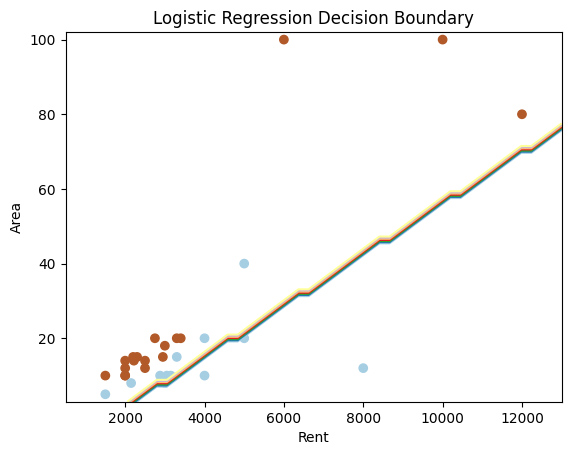

In [30]:
# 绘制数据点
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# 绘制决策边界
x_min, x_max = X[:, 0].min() - 1000, X[:, 0].max() + 1000
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
Z = lr.predict(ss.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlabel('Rent')
plt.ylabel('Area')
plt.title('Logistic Regression Decision Boundary')
plt.show()